# EMアルゴリズムによる階層的混合エキスパートモデルの学習例

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from hmeem import HMEEM, ExpertEM

## サンプルデータの生成

4区間から成る、区間内で線形なデータを生成する。

In [2]:
random_state = np.random.RandomState(seed = 0)

Xs = [
    np.arange(0, 1, 0.01).reshape(100, 1),
    np.arange(1, 2, 0.01).reshape(100, 1),
    np.arange(2, 3, 0.01).reshape(100, 1),
    np.arange(3, 4, 0.01).reshape(100, 1)
]
X = np.vstack(Xs)

# 丸括弧内の値をHMEが学習できれば成功。
Ys = [
    (+4) * Xs[0] + (-1) + random_state.randn(100).reshape(100, 1) * (0.3),
    (-1) * Xs[1] + (+1) + random_state.randn(100).reshape(100, 1) * (0.5),
    (+2) * Xs[2] + (-4) + random_state.randn(100).reshape(100, 1) * (0.2),
    (-3) * Xs[2] + (+8) + random_state.randn(100).reshape(100, 1) * (0.4)
]
Y = np.vstack(Ys)

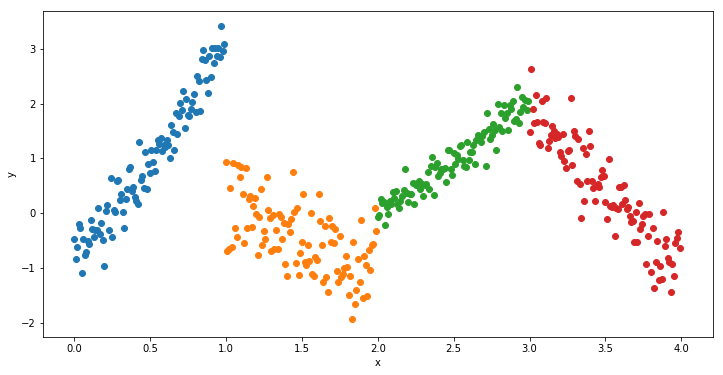

In [3]:
plt.figure(figsize = (12, 6))
for i in range(4):
    plt.scatter(x = Xs[i][:, 0], y = Ys[i][:, 0])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 学習

2階層のHMEを学習させる。

In [4]:
random_state = np.random.RandomState(seed = 1)
verbose = 1

e00 = ExpertEM(U = random_state.randn(2, 1), Sigma = np.eye(1), verbose = verbose)
e01 = ExpertEM(U = random_state.randn(2, 1), Sigma = np.eye(1), verbose = verbose)
e10 = ExpertEM(U = random_state.randn(2, 1), Sigma = np.eye(1), verbose = verbose)
e11 = ExpertEM(U = random_state.randn(2, 1), Sigma = np.eye(1), verbose = verbose)

n0 = HMEEM(v = random_state.randn(2, 2), children = [e00, e01], verbose = verbose)
n1 = HMEEM(v = random_state.randn(2, 2), children = [e10, e11], verbose = verbose)

root = HMEEM(v = random_state.randn(2, 2), children = [n0, n1], em_tol = 1, verbose = verbose)

In [5]:
def show(hme, X, Y):
    pred_y = hme.predict(X)
    pred_p = hme.predict_proba(X, pred_y)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex = "all", figsize = (12, 6))
    ax1.scatter(x = X[:, 0], y = Y[:, 0])
    ax1.scatter(x = X[:, 0], y = pred_y[:, 0], c = pred_p)
    ax2.scatter(x = X[:, 0], y = e00.z(X), label = "e00")
    ax2.scatter(x = X[:, 0], y = e01.z(X), label = "e01")
    ax2.scatter(x = X[:, 0], y = e10.z(X), label = "e10")
    ax2.scatter(x = X[:, 0], y = e11.z(X), label = "e11")
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_xlabel("x")
    ax1.set_ylabel("y")
    ax2.set_ylabel("p(z)")
    plt.legend()
    plt.show()
    print("e00: mu = ({:+6.2f}) x + ({:+6.2f}), std = {:.2f}".format(e00.U[0, 0], e00.U[1, 0], np.sqrt(e00.Sigma)[0, 0]))
    print("e01: mu = ({:+6.2f}) x + ({:+6.2f}), std = {:.2f}".format(e01.U[0, 0], e01.U[1, 0], np.sqrt(e01.Sigma)[0, 0]))
    print("e10: mu = ({:+6.2f}) x + ({:+6.2f}), std = {:.2f}".format(e10.U[0, 0], e10.U[1, 0], np.sqrt(e10.Sigma)[0, 0]))
    print("e11: mu = ({:+6.2f}) x + ({:+6.2f}), std = {:.2f}".format(e11.U[0, 0], e11.U[1, 0], np.sqrt(e11.Sigma)[0, 0]))
    print()

EM: step = 0, log-likelihood = -960.3524662541076


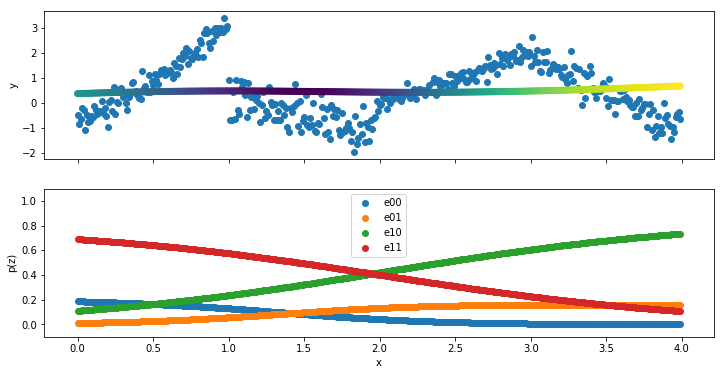

e00: mu = ( +0.50) x + ( +0.40), std = 0.99
e01: mu = ( -0.01) x + ( -0.70), std = 0.55
e10: mu = ( +0.42) x + ( -0.85), std = 0.71
e11: mu = ( +0.30) x + ( +0.59), std = 0.93

EM: step = 1, log-likelihood = -952.3483436718656


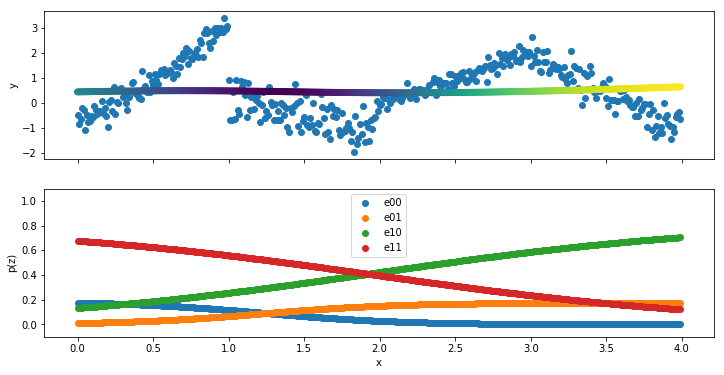

e00: mu = ( +0.39) x + ( +0.58), std = 1.10
e01: mu = ( +0.00) x + ( -0.74), std = 0.51
e10: mu = ( +0.36) x + ( -0.63), std = 0.75
e11: mu = ( +0.24) x + ( +0.65), std = 0.96

EM: step = 2, log-likelihood = -946.8091557767912


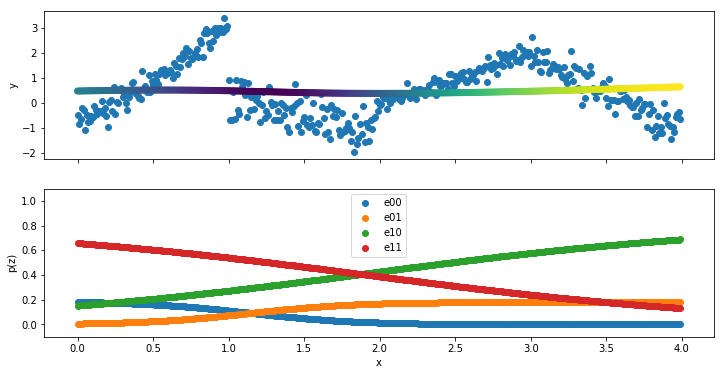

e00: mu = ( +0.41) x + ( +0.70), std = 1.18
e01: mu = ( +0.02) x + ( -0.78), std = 0.49
e10: mu = ( +0.33) x + ( -0.48), std = 0.76
e11: mu = ( +0.20) x + ( +0.67), std = 0.97

EM: step = 3, log-likelihood = -939.2714445938898


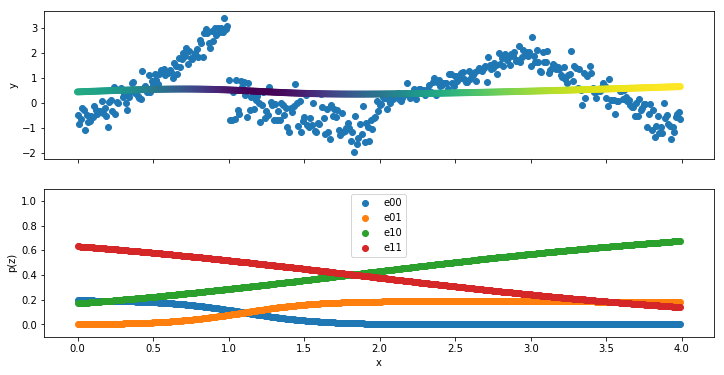

e00: mu = ( +0.96) x + ( +0.53), std = 1.17
e01: mu = ( +0.03) x + ( -0.82), std = 0.48
e10: mu = ( +0.32) x + ( -0.38), std = 0.76
e11: mu = ( +0.18) x + ( +0.65), std = 0.98

EM: step = 4, log-likelihood = -917.8663790606067


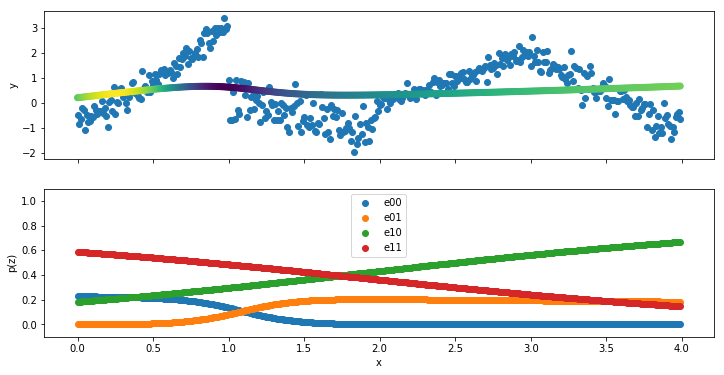

e00: mu = ( +2.77) x + ( -0.37), std = 0.86
e01: mu = ( +0.04) x + ( -0.87), std = 0.47
e10: mu = ( +0.31) x + ( -0.30), std = 0.75
e11: mu = ( +0.18) x + ( +0.61), std = 0.96

EM: step = 5, log-likelihood = -861.1804082307156


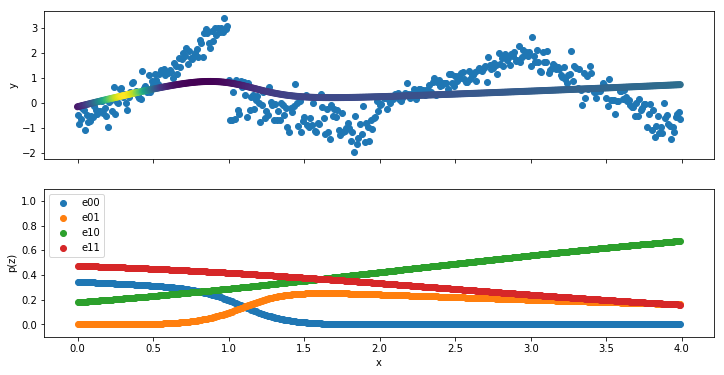

e00: mu = ( +3.99) x + ( -0.94), std = 0.33
e01: mu = ( +0.05) x + ( -0.89), std = 0.47
e10: mu = ( +0.30) x + ( -0.24), std = 0.74
e11: mu = ( +0.21) x + ( +0.47), std = 0.90

EM: step = 6, log-likelihood = -828.487802523538


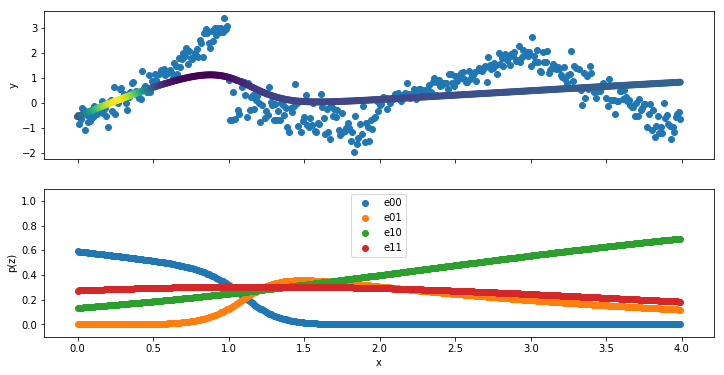

e00: mu = ( +4.02) x + ( -0.96), std = 0.26
e01: mu = ( +0.04) x + ( -0.87), std = 0.47
e10: mu = ( +0.29) x + ( -0.18), std = 0.73
e11: mu = ( +0.29) x + ( +0.20), std = 0.79

EM: step = 7, log-likelihood = -812.6406011051033


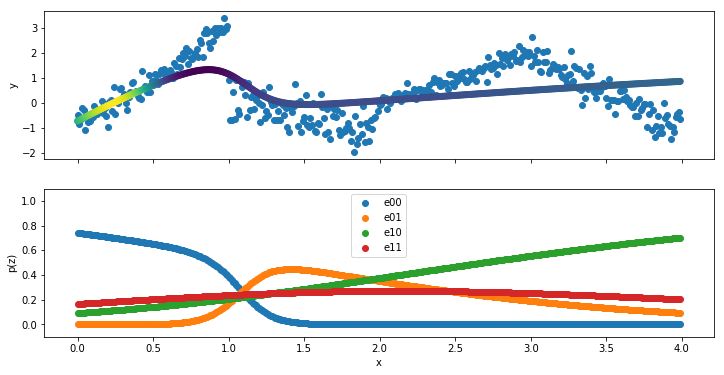

e00: mu = ( +3.99) x + ( -0.96), std = 0.26
e01: mu = ( +0.01) x + ( -0.79), std = 0.47
e10: mu = ( +0.23) x + ( -0.02), std = 0.73
e11: mu = ( +0.38) x + ( -0.03), std = 0.70

EM: step = 8, log-likelihood = -799.876415375558


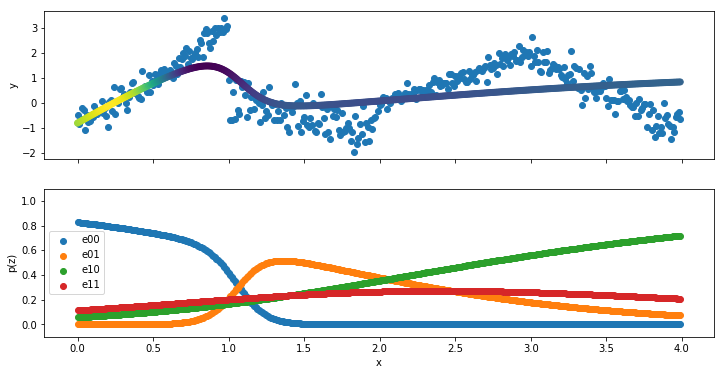

e00: mu = ( +3.96) x + ( -0.95), std = 0.26
e01: mu = ( -0.03) x + ( -0.69), std = 0.47
e10: mu = ( +0.14) x + ( +0.22), std = 0.75
e11: mu = ( +0.47) x + ( -0.23), std = 0.63

EM: step = 9, log-likelihood = -784.6304471243872


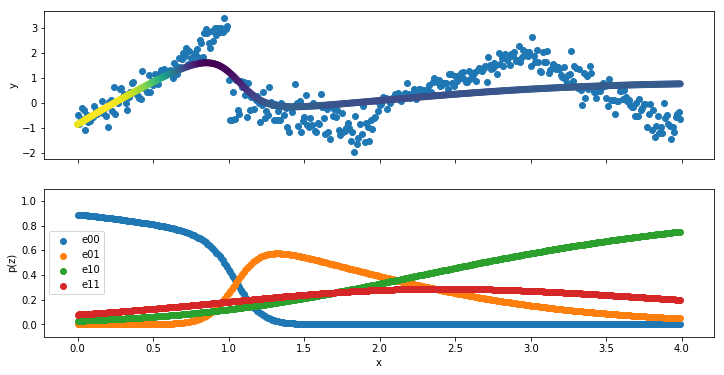

e00: mu = ( +3.94) x + ( -0.94), std = 0.27
e01: mu = ( -0.06) x + ( -0.59), std = 0.48
e10: mu = ( +0.01) x + ( +0.54), std = 0.76
e11: mu = ( +0.57) x + ( -0.44), std = 0.56

EM: step = 10, log-likelihood = -765.5309110384295


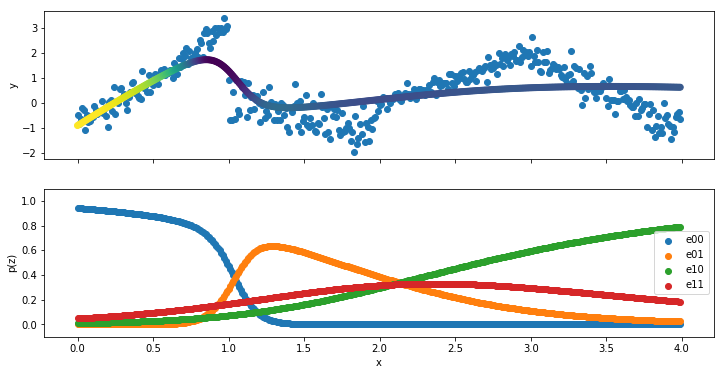

e00: mu = ( +3.92) x + ( -0.93), std = 0.28
e01: mu = ( -0.11) x + ( -0.49), std = 0.49
e10: mu = ( -0.15) x + ( +0.95), std = 0.77
e11: mu = ( +0.67) x + ( -0.64), std = 0.50

EM: step = 11, log-likelihood = -744.1406509110168


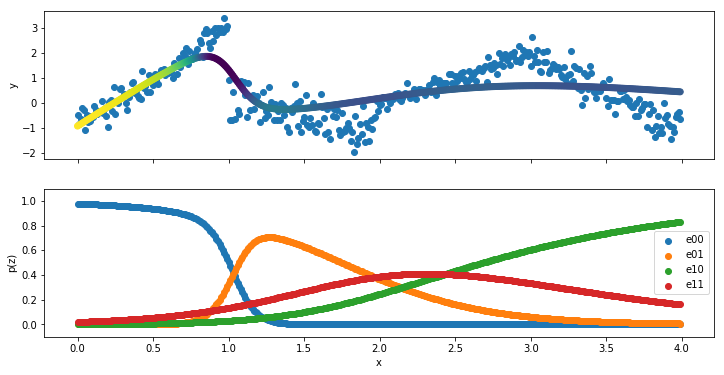

e00: mu = ( +3.90) x + ( -0.92), std = 0.29
e01: mu = ( -0.18) x + ( -0.35), std = 0.51
e10: mu = ( -0.33) x + ( +1.44), std = 0.75
e11: mu = ( +0.76) x + ( -0.83), std = 0.46

EM: step = 12, log-likelihood = -718.9201387763949


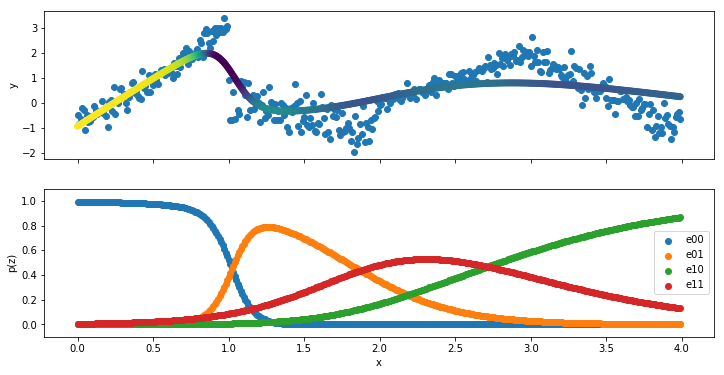

e00: mu = ( +3.90) x + ( -0.92), std = 0.29
e01: mu = ( -0.40) x + ( +0.02), std = 0.52
e10: mu = ( -0.51) x + ( +1.99), std = 0.72
e11: mu = ( +0.84) x + ( -1.05), std = 0.44

EM: step = 13, log-likelihood = -674.3952434361722


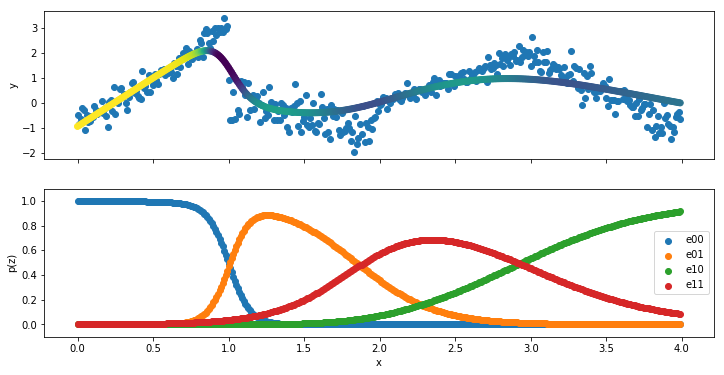

e00: mu = ( +3.90) x + ( -0.93), std = 0.30
e01: mu = ( -0.93) x + ( +0.89), std = 0.53
e10: mu = ( -0.78) x + ( +2.88), std = 0.67
e11: mu = ( +0.99) x + ( -1.45), std = 0.42

EM: step = 14, log-likelihood = -620.2675284407889


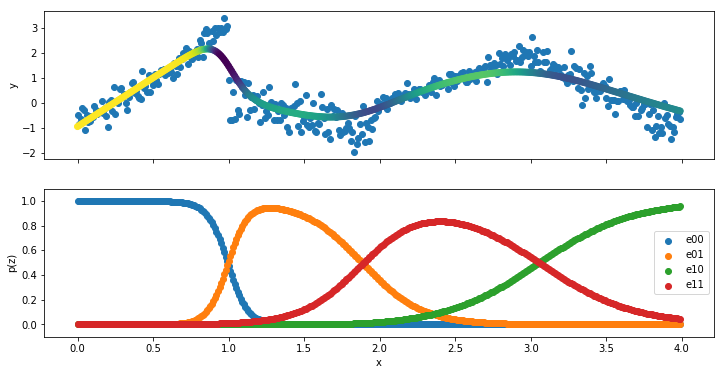

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.35) x + ( +1.53), std = 0.51
e10: mu = ( -1.32) x + ( +4.80), std = 0.58
e11: mu = ( +1.25) x + ( -2.19), std = 0.36

EM: step = 15, log-likelihood = -570.80970146817


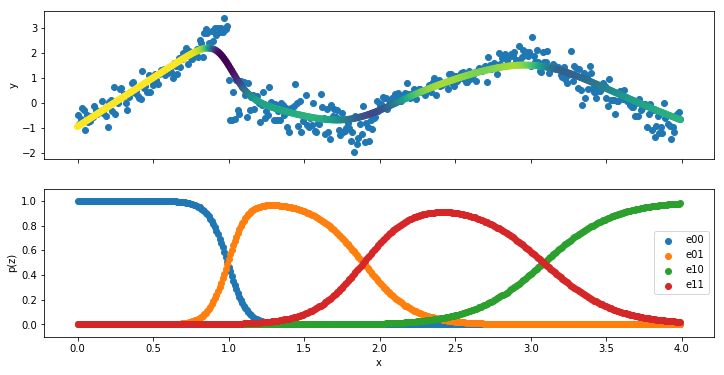

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.50) x + ( +1.74), std = 0.49
e10: mu = ( -2.09) x + ( +7.58), std = 0.45
e11: mu = ( +1.48) x + ( -2.78), std = 0.32

EM: step = 16, log-likelihood = -535.4967826454114


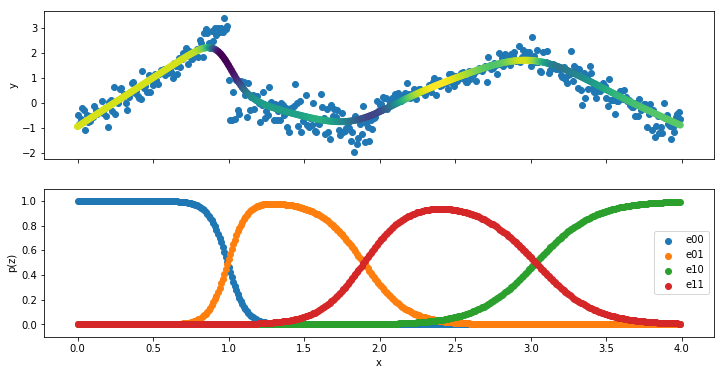

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.54) x + ( +1.79), std = 0.49
e10: mu = ( -2.58) x + ( +9.38), std = 0.37
e11: mu = ( +1.69) x + ( -3.29), std = 0.26

EM: step = 17, log-likelihood = -518.0623977022988


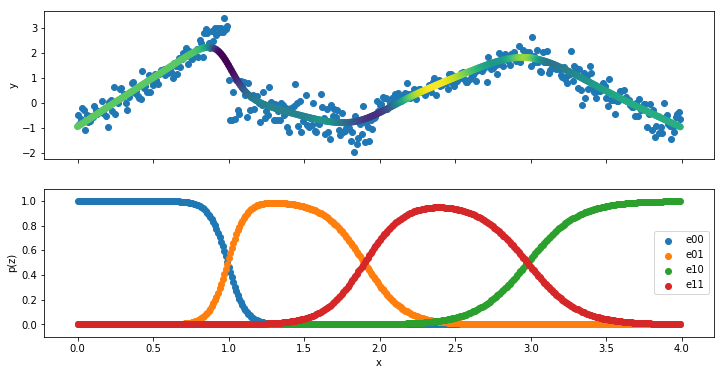

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.54) x + ( +1.80), std = 0.49
e10: mu = ( -2.74) x + ( +9.99), std = 0.36
e11: mu = ( +1.85) x + ( -3.68), std = 0.21

EM: step = 18, log-likelihood = -512.9129766008801


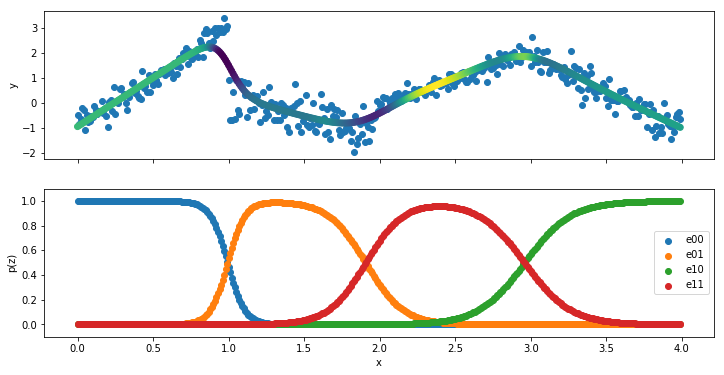

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.52) x + ( +1.78), std = 0.49
e10: mu = ( -2.79) x + (+10.15), std = 0.36
e11: mu = ( +1.92) x + ( -3.84), std = 0.19

EM: step = 19, log-likelihood = -510.5422170228424


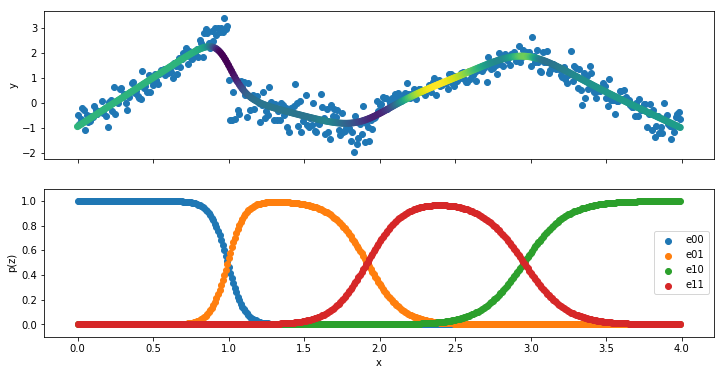

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.51) x + ( +1.77), std = 0.49
e10: mu = ( -2.80) x + (+10.19), std = 0.36
e11: mu = ( +1.94) x + ( -3.89), std = 0.19

EM: step = 20, log-likelihood = -508.8199641007768


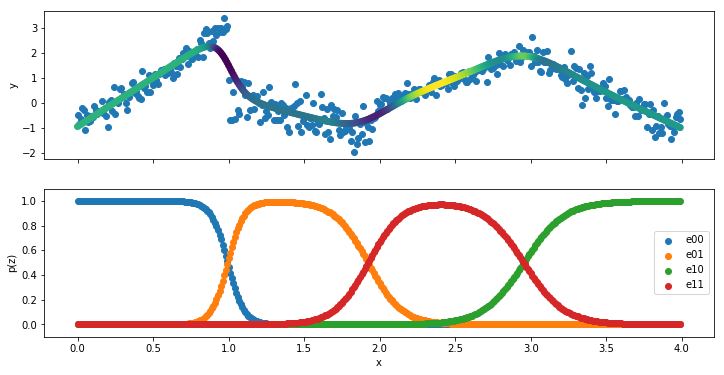

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.50) x + ( +1.76), std = 0.49
e10: mu = ( -2.81) x + (+10.22), std = 0.36
e11: mu = ( +1.95) x + ( -3.91), std = 0.19

EM: step = 21, log-likelihood = -507.4225960357252


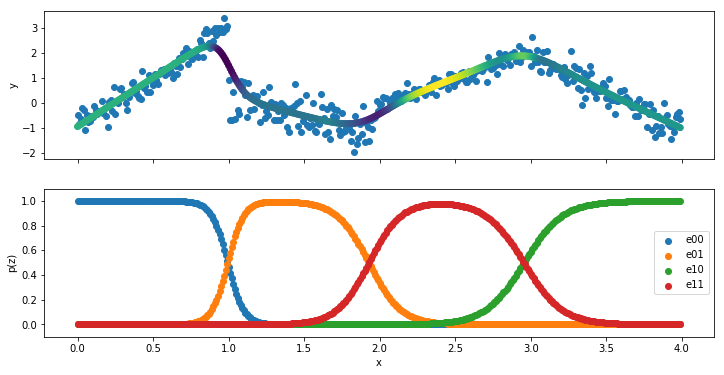

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.50) x + ( +1.75), std = 0.49
e10: mu = ( -2.81) x + (+10.24), std = 0.36
e11: mu = ( +1.96) x + ( -3.93), std = 0.19

EM: step = 22, log-likelihood = -506.24456237741833


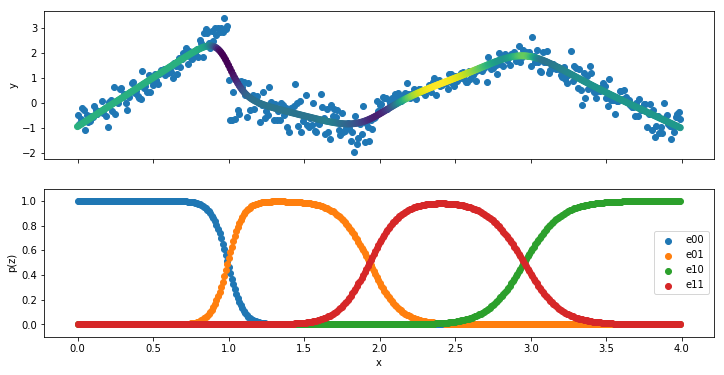

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.50) x + ( +1.75), std = 0.49
e10: mu = ( -2.82) x + (+10.26), std = 0.36
e11: mu = ( +1.96) x + ( -3.94), std = 0.19

EM: step = 23, log-likelihood = -505.228472102301


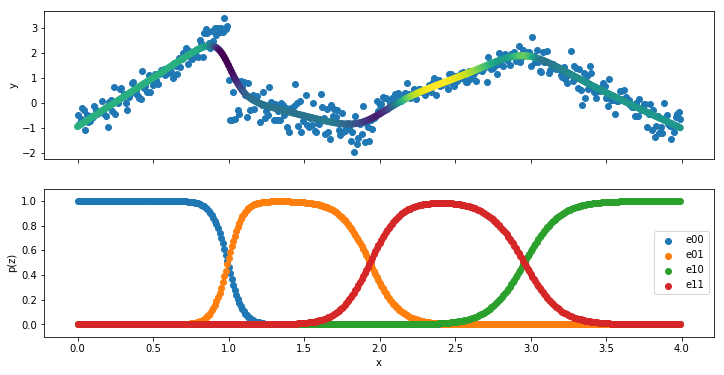

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.49) x + ( +1.74), std = 0.49
e10: mu = ( -2.82) x + (+10.28), std = 0.36
e11: mu = ( +1.97) x + ( -3.95), std = 0.19

EM: step = 24, log-likelihood = -504.33744097218386


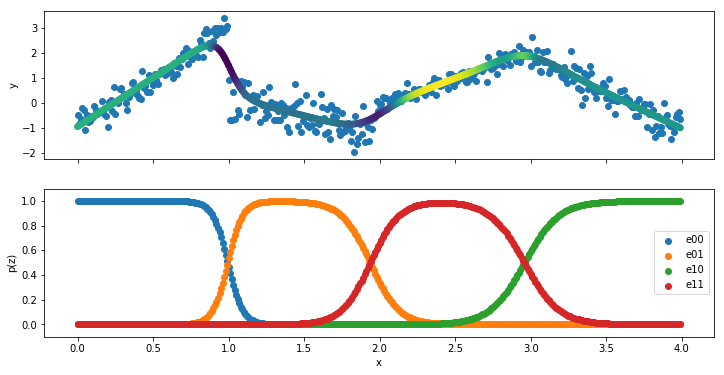

e00: mu = ( +3.91) x + ( -0.94), std = 0.30
e01: mu = ( -1.49) x + ( +1.74), std = 0.49
e10: mu = ( -2.83) x + (+10.30), std = 0.36
e11: mu = ( +1.97) x + ( -3.96), std = 0.19



In [6]:
root.fit(X, Y, callbacks = [show])